# **1- Introduction**

As an example of working with some time series data, let’s take a look at bicycle counts on Seattle’s Fremont Bridge. This data comes from an automated bicycle counter, installed in late 2012, which has inductive sensors on the east and west sidewalks of the bridge. The hourly bicycle counts can be downloaded from here.

# **3- Import Nessary library**

In [ ]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# **2-Read Dataset**

Once this dataset is downloaded, we can use Pandas to read the CSV output into a DataFrame. We will specify that we want the Date as an index, and we want these dates to be automatically parsed:


In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/Datasets/Time Series/fremont-bridge.csv", index_col= 'Date',parse_dates=['Date'])
#df = df[df.symbol == "GOOG"]

In [50]:
data.head()

,West,East
Date,,
2012-10-03 00:00:00,4.0,9.0
2012-10-03 01:00:00,4.0,6.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,2.0,3.0
2012-10-03 04:00:00,6.0,1.0


# **5- shortening the column names**
For convenience, we’ll further process this dataset by shortening the column names and adding a “Total” column:



In [51]:
data.columns = ["West", "East"]

In [52]:
data["Total"] = data["West"] + data["East"] 


In [53]:
data.head()

,West,East,Total
Date,,,
2012-10-03 00:00:00,4.0,9.0,13.0
2012-10-03 01:00:00,4.0,6.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,2.0,3.0,5.0
2012-10-03 04:00:00,6.0,1.0,7.0


# **6-statistics** 

Now let’s take a look at the summary statistics for this data:



In [54]:
 data.dropna().describe()

,West,East,Total
count,45976.000000,45976.000000,45976.000000
mean,54.712306,55.479315,110.191622
std,72.935797,80.232055,139.189603
min,0.000000,0.000000,0.000000
25%,7.000000,7.000000,15.000000
50%,29.000000,28.000000,60.000000
75%,72.000000,68.000000,144.000000
max,854.000000,717.000000,1165.000000


# **7- Visualizing the data**

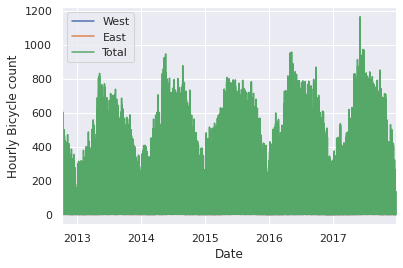

In [55]:
import matplotlib.pyplot as plt
import seaborn
seaborn.set()
data.plot()
plt.ylabel("Hourly Bicycle count")
plt.show()

The ~25,000 hourly samples are far too dense for us to make much sense of. We can gain more insight by resampling the data to a coarser grid. Let’s resample by week:

In [ ]:
weekly = data.resample("W").sum()
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly bicycle count')
plt.show()

This shows us some interesting seasonal trends: as you might expect, people bicycle more in the summer than in the winter, and even within a particular season the bicycle use varies from week to week.

Another way that comes in handy for aggregating the data is to use a rolling mean, utilizing the pd.rolling_mean() function. Here we’ll do a 30-day rolling mean of our data, making sure to center the window:

In [ ]:
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])
plt.ylabel('mean hourly count')
plt.show()

The jaggedness of the result is due to the hard cutoff of the window. We can get a smoother version of a rolling mean using a window function—for example, a Gaussian window.

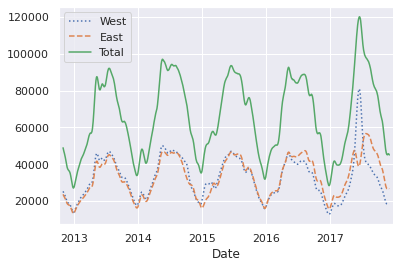

In [58]:
daily.rolling(50, center=True,
              win_type='gaussian').sum(std=10).plot(style=[':','--', '-'])
plt.show()

# **Reference** 
[Data Science Project on Time Series](https://thecleverprogrammer.com/2020/05/08/data-science-project-on-time-series/)